In [1]:
import pandas as pd
import joblib
import os

In [2]:
test = pd.read_parquet('Data/test_all_slopes_corr_pcaslope.parquet')
to_remove = pd.read_csv('Data/corr_importance_to_remove.csv')['col'].to_list()
test.drop(to_remove, axis=1, inplace=True)
test.shape

(924621, 2231)

In [3]:
def predict(data):
    
    models = [
        'fold_0_iter',
        'fold_1_iter',
        'fold_2_iter',
        'fold_3_iter',
        'fold_4_iter',
    ]

    model_list = []
    for path in ['models_DART_SlopesCorrPCAslope/']:
        for fname in os.listdir(path):
            for model_name in models:
                if model_name in fname:
                    model_list.append(path + fname)

    pred_list = []
    for model_path in model_list:
        print(model_path)
        print('{:.02f} MB'.format(os.path.getsize(model_path)/1000000))
        model = joblib.load(model_path)
        pred_list.append(model.predict(data))
    
    return pred_list

In [4]:
pred_list = predict(test)

models_DART_SlopesCorrPCAslope/fold_1_iter_7331_score_0.79111.pkl
85.32 MB
models_DART_SlopesCorrPCAslope/fold_3_iter_9890_score_0.79017.pkl
114.93 MB
models_DART_SlopesCorrPCAslope/fold_0_iter_9660_score_0.80057.pkl
112.27 MB
models_DART_SlopesCorrPCAslope/fold_4_iter_14089_score_0.79741.pkl
163.57 MB
models_DART_SlopesCorrPCAslope/fold_2_iter_13963_score_0.79524.pkl
162.10 MB


In [9]:
column_name = [
    'fold_1',
    'fold_3',
    'fold_0',
    'fold_4',
    'fold_2',
]

pred_df = pd.DataFrame(pred_list).T
pred_df.columns = column_name
pred_df.index = test.index

In [10]:
pred_df

,fold_1,fold_3,fold_0,fold_4,fold_2
customer_ID,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.026425,0.026737,0.026763,0.021526,0.023216
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.001234,0.000931,0.001065,0.001004,0.000713
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.041039,0.048128,0.046278,0.073635,0.046868
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.327487,0.319808,0.251376,0.207306,0.309068
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.797842,0.842926,0.867043,0.853418,0.818241
...,...,...,...,...,...
ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,0.009601,0.008326,0.011954,0.009041,0.011178
ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,0.768258,0.751341,0.773838,0.794073,0.789067
ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.517303,0.441137,0.480069,0.492283,0.389535


In [11]:
pred_df.to_csv('Output/p_LgbmDART_AggPcaDiffRoundSlopeCorrLowPcaSlope_HT1_0.7949_folds.csv')
pred_df.mean(axis=1).to_csv('Output/p_LgbmDART_AggPcaDiffRoundSlopeCorrLowPcaSlope_HT1_0.7949.csv', header=['prediction'])

### Evaluate the folds

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore')

In [24]:
pred_df = pd.read_csv('Output/p_LgbmDART_AggPcaDiffRoundSlopeCorrLowPcaSlope_HT1_0.7949_folds.csv', index_col='customer_ID')
columns = pred_df.columns
pred_df.shape

(924621, 5)

In [25]:
pred_df['mean'] = pred_df[columns].mean(axis=1)
pred_df['min'] = pred_df[columns].min(axis=1)
pred_df['max'] = pred_df[columns].max(axis=1)
pred_df['median'] = pred_df[columns].median(axis=1)
pred_df['skew'] = pred_df[columns].skew(axis=1)
pred_df['kurtosis'] = pred_df[columns].kurtosis(axis=1)
pred_df['diff'] = pred_df['max'] - pred_df['min']
pred_df.shape

(924621, 12)

In [26]:
pred_df.sort_values('mean', ascending=False, inplace=True)
n_components = 10
pca = PCA(n_components=n_components, random_state=42)
pred_PCA = pca.fit_transform(pred_df)
pred_PCA_df = pd.DataFrame(pred_PCA, index=pred_df.index, columns=['PCA' + str(i) for i in range(n_components)])
pred_PCA_df['rank'] = range(0, pred_PCA_df.shape[0], 1)
print(pca.explained_variance_ratio_)

[6.79659153e-01 1.87511831e-01 1.32242717e-01 3.15119070e-04
 8.01287919e-05 7.42334088e-05 5.67556309e-05 5.09066646e-05
 7.89557819e-06 1.25912410e-06]


In [27]:
pred_PCA_df

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,rank
customer_ID,,,,,,,,,,,
dcab0bc40dfb3d46378d1509964bd81d91a74b44757b46255f1bc0581b09e898,-1.062171,2.328019,-0.119113,-0.082328,-0.011811,-0.003053,-0.002312,-0.002785,-0.003859,0.000628,0
a41fa6ad66fc6d0c6bb722b1971db6d8001fcf268cf98c7028192b6057a727ce,0.754398,2.523496,0.380298,-0.084987,-0.010929,-0.002881,-0.002510,-0.002987,-0.006390,0.001012,1
7f84f6ff88a9367e2204d06484b61da48e19b1ccbece8da53dc3ed7d15dd83ae,-1.554204,2.252660,-0.319220,-0.081349,-0.012071,-0.003086,-0.002216,-0.002648,-0.002807,0.000457,2
63e3e90b4aba94cb090c59267927282e0ac1c8c977b4a136ab38315df3a65606,0.157421,2.441866,0.165826,-0.084027,-0.011313,-0.003007,-0.002428,-0.002886,-0.005282,0.000846,3
d8b74995acfde6bb0725dd50f0ffa2ad044d0a03aae94dc9083d2137ae6ac818,-2.781983,2.264320,-0.236378,-0.080091,-0.011843,-0.003099,-0.002113,-0.002763,-0.003356,0.000610,4
...,...,...,...,...,...,...,...,...,...,...,...
5d3ccf47ae0a80d8b03f6fbc4cf7d8431a353e73301a6a9709aea86901d1f2e6,0.031387,-0.701441,0.244871,-0.020318,0.003303,0.000025,-0.000018,0.000449,-0.000099,0.000025,924616
48757f9f6cbb140d4f826485f8d2f6567eb4039fcf1956a72c11077a2e767457,0.095657,-1.013062,-0.668405,-0.019412,0.001289,-0.000142,0.000118,0.000988,0.004897,-0.000802,924617
e8cb7996fac777e8dbae31ef43babbbc2b7de84b1167cfec763bed3fbf040445,0.060979,-0.844931,-0.175623,-0.019856,0.002351,-0.000069,0.000039,0.000690,0.002199,-0.000354,924618


In [33]:
gmm = GaussianMixture(n_components = 3, random_state = 42).fit(pred_PCA_df.drop('rank', axis=1))
labels_gmm = gmm.predict(pred_PCA_df.drop('rank', axis=1))

/home/mora/miniconda3/envs/rapids-22.06/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


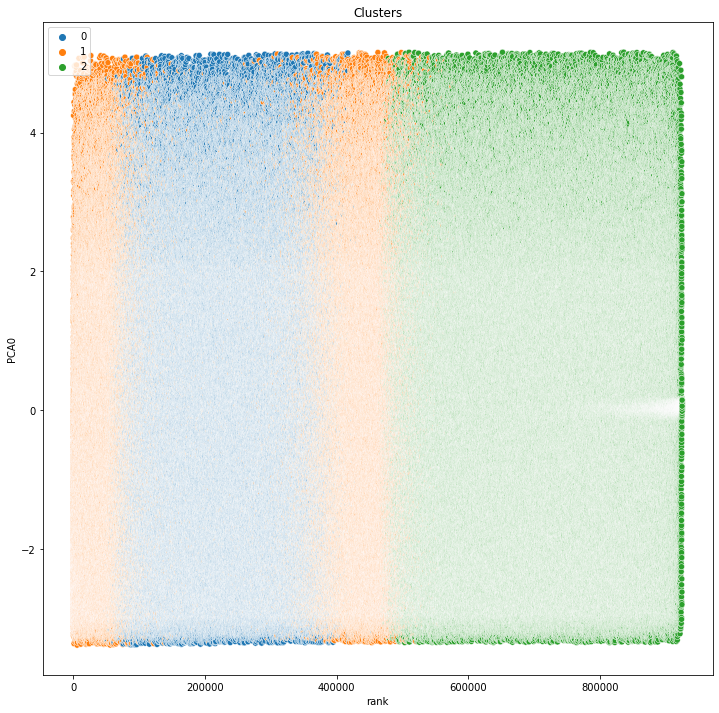

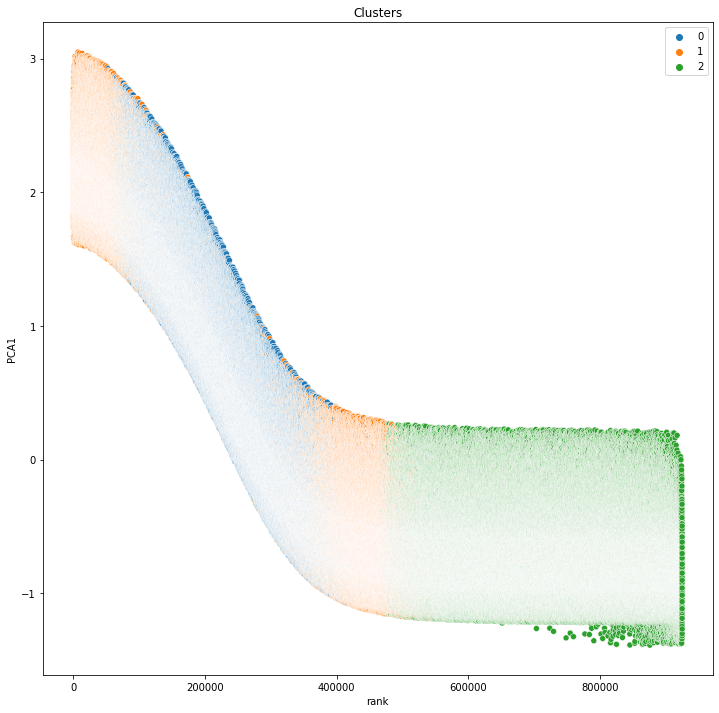

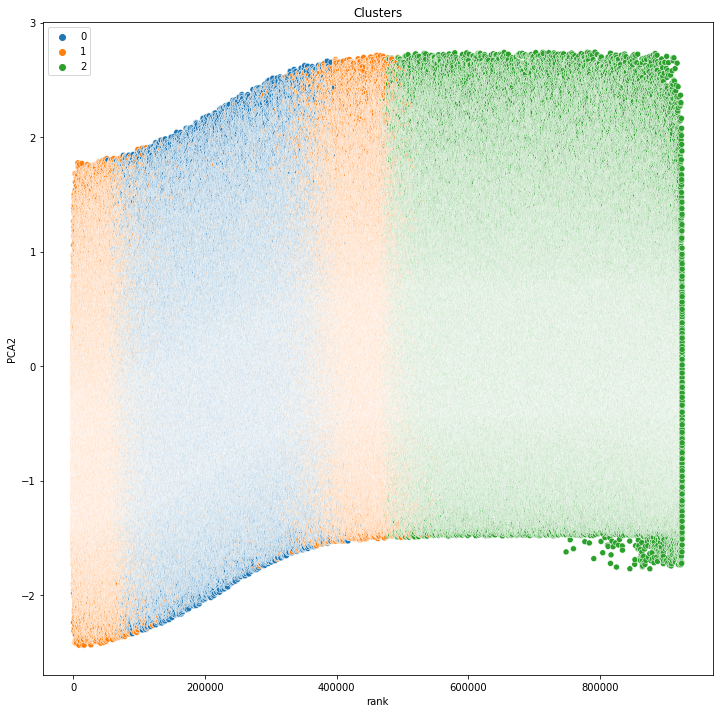

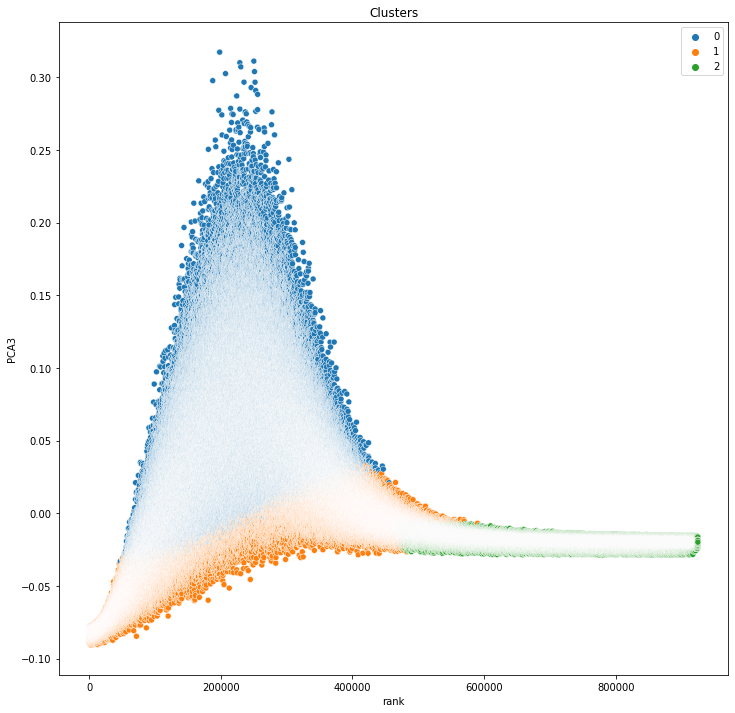

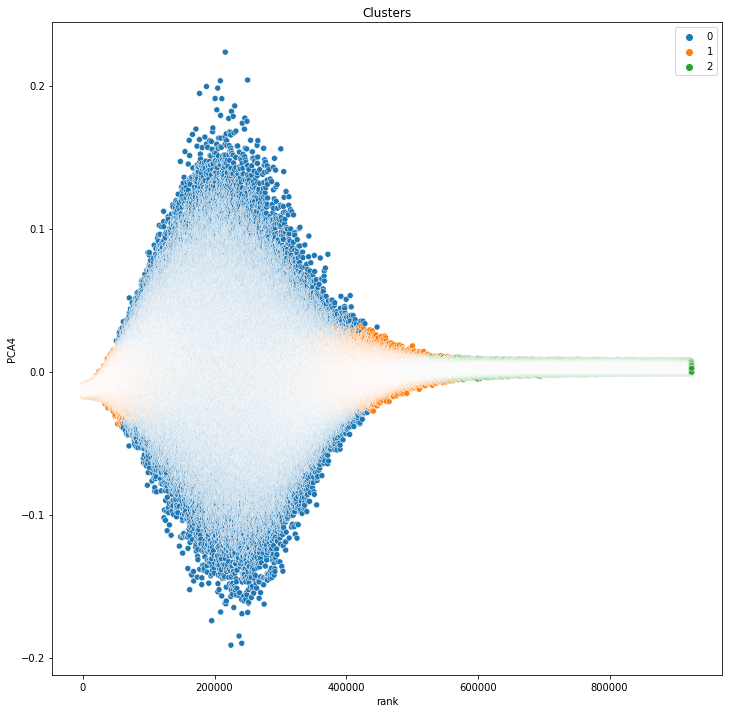

In [36]:
for i in range(0,5):

    plt.figure(figsize=(12,12))
    sns.scatterplot(x=pred_PCA_df['rank'],y=pred_PCA_df['PCA{}'.format(i)], hue=labels_gmm, palette='tab10')
    plt.title("Clusters")
    plt.show()